In [ ]:
#Linear Regression Model Project
#Done By: Layth Al-Nemri

## Part 1 - Getting Started

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Prepare your dataset as follows:
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`.
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'.
*   Insert a first column of all $1$s in both the training and validation data sets.
3. Explain why we should not insert the column of $1$s prior to standardization.

Answer:

Standardizing a column of 1 would result in a column of 0 instead since the mean would be 1 (and we subtract the mean from the value when standardizing in order to get a mean of 0). We need the first column to be 1 to set an intercept for the whole regrission introducing a baseline and a constant value b0.

In [ ]:
print(df)

                                             article_url  timedelta  \
0                           amazon-instant-video-browser      731.0   
1                            ap-samsung-sponsored-tweets      731.0   
2                         apple-40-billion-app-downloads      731.0   
3                               astronaut-notre-dame-bcs      731.0   
4                                       att-u-verse-apps      731.0   
...                                                  ...        ...   
39639                                 samsung-app-autism        8.0   
39640  seth-rogen-james-franco-will-live-tweet-the-in...        8.0   
39641                              son-pays-off-mortgage        8.0   
39642                                     ukraine-blasts        8.0   
39643                              youtube-channels-2015        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594             

In [ ]:
from sklearn.model_selection import train_test_split

df_y = df['shares'].values
df_X = df.drop('shares', axis = 1).values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_X, df_y, test_size=0.2, random_state=1)

In [ ]:
#X_train = X_train.drop('article_url', axis = 1)
#X_val = X_val.drop('article_url', axis = 1)
#print(X_train)
X_train = X_train[:, 1:]
#print(X_train)
#print(X_val)
X_val = X_val[:, 1:]
#print(X_val)

In [ ]:
#type(X_train)

In [ ]:
X_train = X_train.astype(float)

X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

X_train_standardized = (X_train - X_train_mean)/X_train_std
X_val_standardized = (X_val - X_train_mean)/X_train_std

#print(X_train_standardized)
#print(X_val_standardized)

X_train_standardized_1 = np.hstack((np.ones((X_train_standardized.shape[0],1)), X_train_standardized))
X_val_standardized_1 = np.hstack((np.ones((X_val_standardized.shape[0],1)), X_val_standardized))

#print(X_train_standardized_1)
#print(X_val_standardized_1)

## Part 2 - Linear Regression Using Direct Solution

Implement the direct solution of the linear regression problem on the training set.

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets.

In [ ]:
import scipy
from sklearn.metrics import mean_squared_error

W = np.dot(scipy.linalg.inv(np.dot(X_train_standardized_1.T, X_train_standardized_1)), np.dot(X_train_standardized_1.T, y_train))
ytrain_pred = np.dot(X_train_standardized_1, W)
yval_pred = np.dot(X_val_standardized_1, W)

training_RMSE = np.sqrt(mean_squared_error(ytrain_pred, y_train))
validation_RMSE = np.sqrt(mean_squared_error(yval_pred, y_val))

print('training RMSE:', training_RMSE)
print('validation RMSE:', validation_RMSE)

training RMSE: 12166.03665232997
validation RMSE: 8266.782865779363


## Part 3 - Full Batch Gradient Descent

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial.

*  Record the training time (from the first iteration until convergence) using the `time.time()` function.

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.

* Comment on overfitting/underfitting by observing the training and validation RMSE

Answer:

The model underfits since the RMSE value for both the training and validation set is large.
The model does not overfit since the RMSE of the training set is much larger than the one for the validation set.

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)?

Answer:

An iteration is processing one data point, while an epoch is one process of the complete data set for one instance. In other words, an epoch is the complete iterations for the whole data set using a certain model parameter which changes by time, and the iteration is the process of on data point of the data set using that parameter.

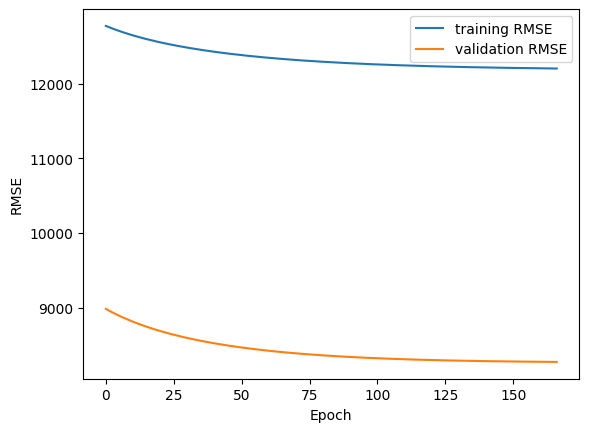

--- Total Training Time: 16.355757236480713 (s) ---


In [ ]:
import matplotlib.pyplot as plt
import time
start_time = time.time() ## Records current time
np.random.seed(2)

w = (np.random.random(X_train_standardized_1.shape[1])/1000)
lr = 0.01
RMSE_train = []
RMSE_val =[]

while True:
  ytrain_pred2 = np.dot(X_train_standardized_1, w.T)
  #print(X_train_standardized_1.shape)
  #print(y_train.shape)
  #print(ytrain_pred2.shape)
  RMSE_train.append(np.sqrt(mean_squared_error(ytrain_pred2, y_train)))

  gradients = (np.dot(X_train_standardized_1.T, ytrain_pred2 - y_train))/len(ytrain_pred2)
  w = w - lr * gradients

  yval_pred2 = np.dot(X_val_standardized_1, w.T)
  RMSE_val.append(np.sqrt(mean_squared_error(yval_pred2, y_val)))

  if (np.sqrt(mean_squared_error(yval_pred2, y_val))) <= (1.001*validation_RMSE):
    break

plt.plot(RMSE_train, label = 'training RMSE')
plt.plot(RMSE_val, label = 'validation RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

## Part 4 - Mini-batch and Stochastic Gradient Descent

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached.

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$.

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE.
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE.
  3. Plot Total training time (y-axis) vs. Batch size (x-axis).

Describe your findings, including the main takeaways from each of your plots.

Number of batches used kept going until we got 5 converged trials.
Up until a batch size of 128 the model diverges, indicating a need to fix the learning rate to suit smaller batches.
Then it starts to converge from 256 batch size and up.

However, a smaller batch size results in a smaller RMSE and smaller number of epoches to convergence as noticed in the first graph. The bigger the batch the higher its line in the graph and the longer it is indicating more epoches.

Time vs RMSE graph proves the speed as well, faster convergence means faster time; smaller batch size means faster convergence.

The larger the batch size is, the longer it takes for the model to finish learning and processing, which we see in the final graph time increasing when the batch size increases.

In [ ]:
def RMSE_fun(yPredfun, yfun):
    return np.sqrt(mean_squared_error(yPredfun, yfun))

In [ ]:
def MiniBatch_GradientDescent(X_train, X_val, y_train, y_val, batch_size, lr, CT):
  train_RMSE = []
  val_RMSE = []
  elapsed_time = []

  start_time = time.time()
  w = (np.random.random(X_train.shape[1])/1000)
  val_RMSE_old = 100000000000
  converge = True

  while True:
    i = 0
    while i < X_train.shape[0]:
      X_train_batch = X_train[i:i + batch_size]
      y_train_batch = y_train[i:i + batch_size]
      ytrain_pred3 = np.dot(X_train_batch, w.T)
      gradient = (np.dot(X_train_batch.T, ytrain_pred3 - y_train_batch))/len(ytrain_pred3)
      w = w - lr * gradient
      i += batch_size

    y_train_pre = np.dot(X_train, w.T)
    train_RMSE_new = RMSE_fun(y_train_pre, y_train)
    y_val_pre = np.dot(X_val, w.T)
    val_RMSE_new = RMSE_fun(y_val_pre, y_val)

    if val_RMSE_new > val_RMSE_old:
      print('batch size ', batch_size,"diverges")
      converge = False
      break;

    val_RMSE_old = val_RMSE_new
    train_RMSE.append(train_RMSE_new)
    val_RMSE.append(val_RMSE_new)
    elapsed_time.append(time.time() - start_time)

    permutation_list = list(np.random.permutation(X_train.shape[0]))
    X_train = X_train[permutation_list]
    y_train = y_train[permutation_list]

    if val_RMSE_new <= CT:
      break

  return w, train_RMSE, val_RMSE, elapsed_time, converge

batch size  2 diverges
batch size  4 diverges
batch size  8 diverges
batch size  16 diverges
batch size  32 diverges
batch size  64 diverges
batch size  128 diverges


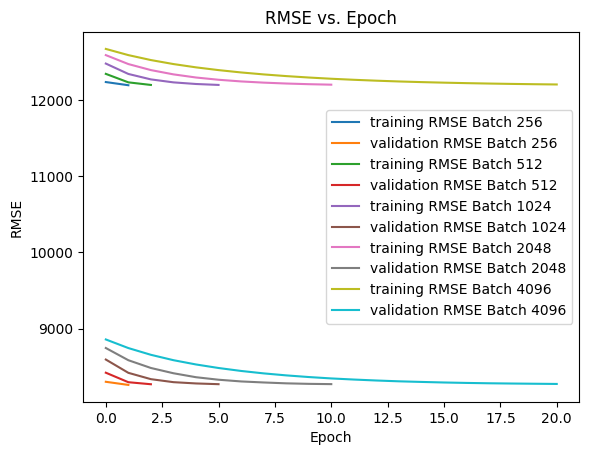

In [ ]:
lr = 0.01
CT = 1.001 * validation_RMSE
expo = 1
converge_counter = 0

while (converge_counter != 5):
  batch_size = 2 ** expo
  expo += 1
  final_w, rmse_train, rmse_val, elapsed_time, converge = MiniBatch_GradientDescent(X_train_standardized_1, X_val_standardized_1, y_train, y_val, batch_size, lr, CT)
  if converge:
    converge_counter += 1
    plt.title('RMSE vs. Epoch')
    train_label = 'training RMSE Batch '+ str(batch_size)
    #train_x_axes = list(range(len(rmse_train)))
    plt.plot(rmse_train, label = train_label)
    val_label = 'validation RMSE Batch '+ str(batch_size)
    #val_x_axes = list(range(len(rmse_val)))
    plt.plot(rmse_val, label = val_label)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()

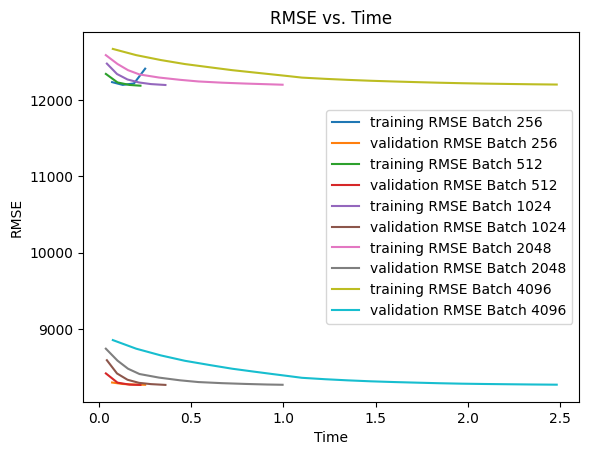

In [ ]:
expo = 8
converge_counter = 0
while (converge_counter != 5):
  batch_size = 2 ** expo
  expo += 1
  final_w, rmse_train, rmse_val, elapsed_time, converge = MiniBatch_GradientDescent(X_train_standardized_1, X_val_standardized_1, y_train, y_val, batch_size, lr, CT)
  if converge:
    converge_counter += 1
    plt.title('RMSE vs. Time')
    train_label = 'training RMSE Batch '+ str(batch_size)
    plt.plot(elapsed_time, rmse_train, label = train_label)
    val_label = 'validation RMSE Batch '+ str(batch_size)
    plt.plot(elapsed_time, rmse_val, label = val_label)
    plt.xlabel('Time')
    plt.ylabel('RMSE')
    plt.legend()

Text(0, 0.5, 'Time')

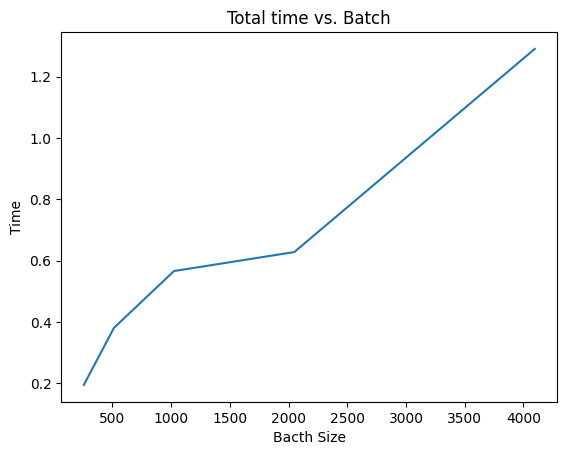

In [ ]:
expo = 8
converge_counter = 0
Total_time_list = []
Batch_list = []
while (converge_counter != 5):
  batch_size = 2 ** expo
  expo += 1
  final_w, rmse_train, rmse_val, elapsed_time, converge = MiniBatch_GradientDescent(X_train_standardized_1, X_val_standardized_1, y_train, y_val, batch_size, lr, CT)
  if converge:
    converge_counter += 1
    Batch_list.append(batch_size)
    Total_time_list.append(elapsed_time[-1])
plt.title('Total time vs. Batch')
plt.plot(Batch_list, Total_time_list)
plt.xlabel('Bacth Size')
plt.ylabel('Time')

## Part 5 - Gradient Descent Learning Rate
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE.

Since it diverges for the mentioned batches, a smaller learning rate is needed.

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure.
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure.
  * Describe your findings, including the main takeaways from each of your plots.

  We went through 14 different learning rate both larger and smaller than the original one (0.01), starting of 0.016 until 0.003 with a 0.001 step.
  A large learning rate caused the model to diverge, it diverged for learning rates from (0.016 until 0.013), but once it got small enough to converge (0.012) it kept on converging until it reached the last tried learning rate.
  However, when the learning rate kept decreasing, it started doing more epoches to reach convergence, and the RMSE started to increase.
  Also, as demonstrated in the second graph, the more epoches needed and the smaller the learning rate is, the longer the time needed to converge is.

  Making 0.012 the suitble learning rate for this model.
  Other trials were made but inorder to keep the graph readable with at least 10 converged learning rate they were removed.

In [ ]:
Batches_picked = [32, 64, 128]
lr_original = 0.01
Findings_Table = pd.DataFrame(columns=['Learning Rate','Training RMSE','Validation RMSE'])
for Bp in Batches_picked:
  for m in range(10):
    lr = lr_original - (m*0.001)
    final_w, rmse_train, rmse_val, elapsed_time, converge = MiniBatch_GradientDescent(X_train_standardized_1, X_val_standardized_1, y_train, y_val, Bp, lr, CT)
    if converge:
      print('Batch ', Bp, 'converges at learning rate ', lr)
      new_row = pd.DataFrame({'Learning Rate':[lr], 'Training RMSE':[rmse_train[-1]], 'Validation RMSE':[rmse_val[-1]]}).rename(index={0:Bp})
      Findings_Table = pd.concat([Findings_Table, new_row])
      break
Findings_Table

batch size  32 diverges
batch size  32 diverges
batch size  32 diverges
batch size  32 diverges
batch size  32 diverges
batch size  32 diverges
batch size  32 diverges
batch size  32 diverges
Batch  32 converges at learning rate  0.002
batch size  64 diverges
batch size  64 diverges
batch size  64 diverges
Batch  64 converges at learning rate  0.007
batch size  128 diverges
batch size  128 diverges
batch size  128 diverges
Batch  128 converges at learning rate  0.007


,Learning Rate,Training RMSE,Validation RMSE
32,0.002,12278.882903,8262.632009
64,0.007,14099.785316,8270.222264
128,0.007,12224.738184,8272.296310


batch size  256 diverges
batch size  256 diverges
batch size  256 diverges
batch size  256 diverges


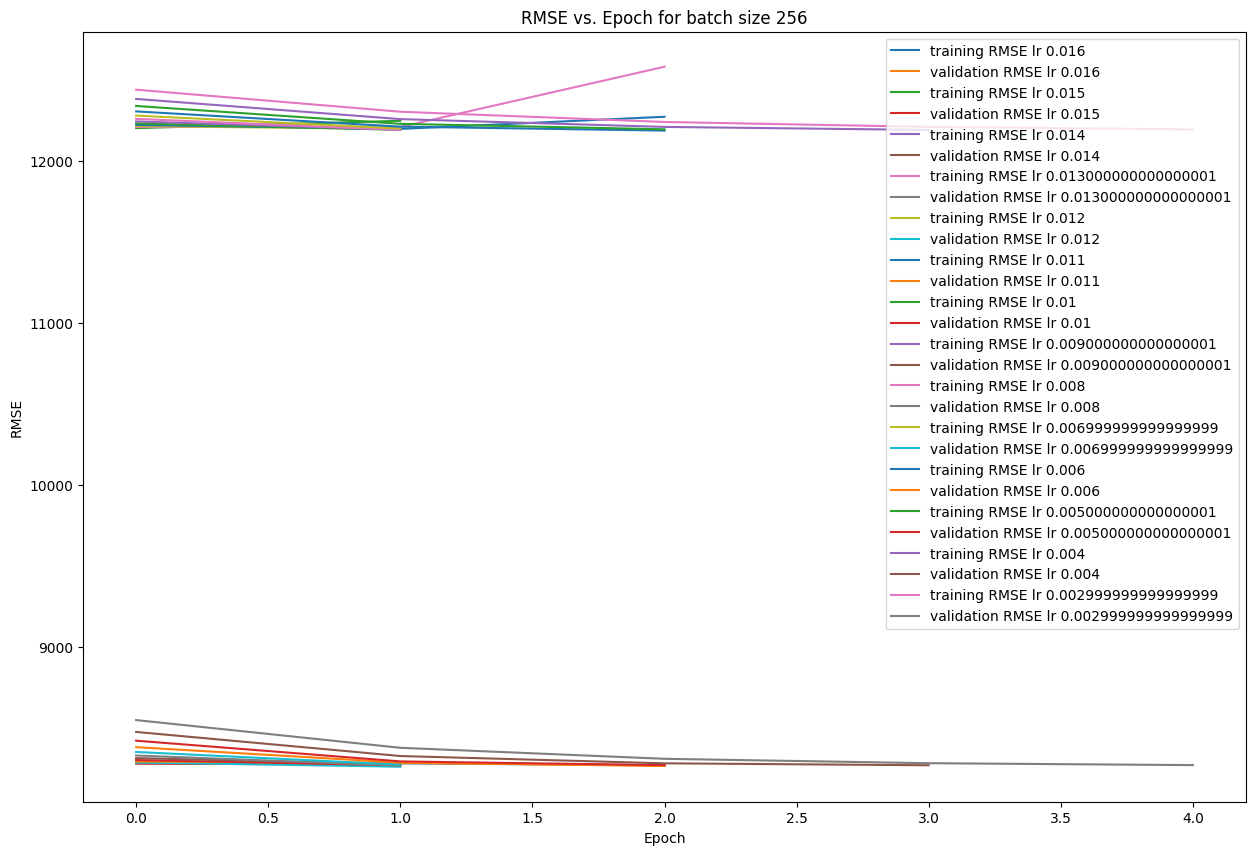

In [ ]:
Best_batch = 256
lr_original = 0.02
plt.figure(figsize=(15,10))
for m in range(4, 18):
  lr = lr_original - (m*0.001)
  final_w, rmse_train, rmse_val, elapsed_time, converge = MiniBatch_GradientDescent(X_train_standardized_1, X_val_standardized_1, y_train, y_val, Best_batch, lr, CT)
  plt.title('RMSE vs. Epoch for batch size 256')
  train_label = 'training RMSE lr '+ str(lr)
  plt.plot(rmse_train, label = train_label)
  val_label = 'validation RMSE lr '+ str(lr)
  plt.plot(rmse_val, label = val_label)
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()

batch size  256 diverges
batch size  256 diverges
batch size  256 diverges
batch size  256 diverges
batch size  256 diverges


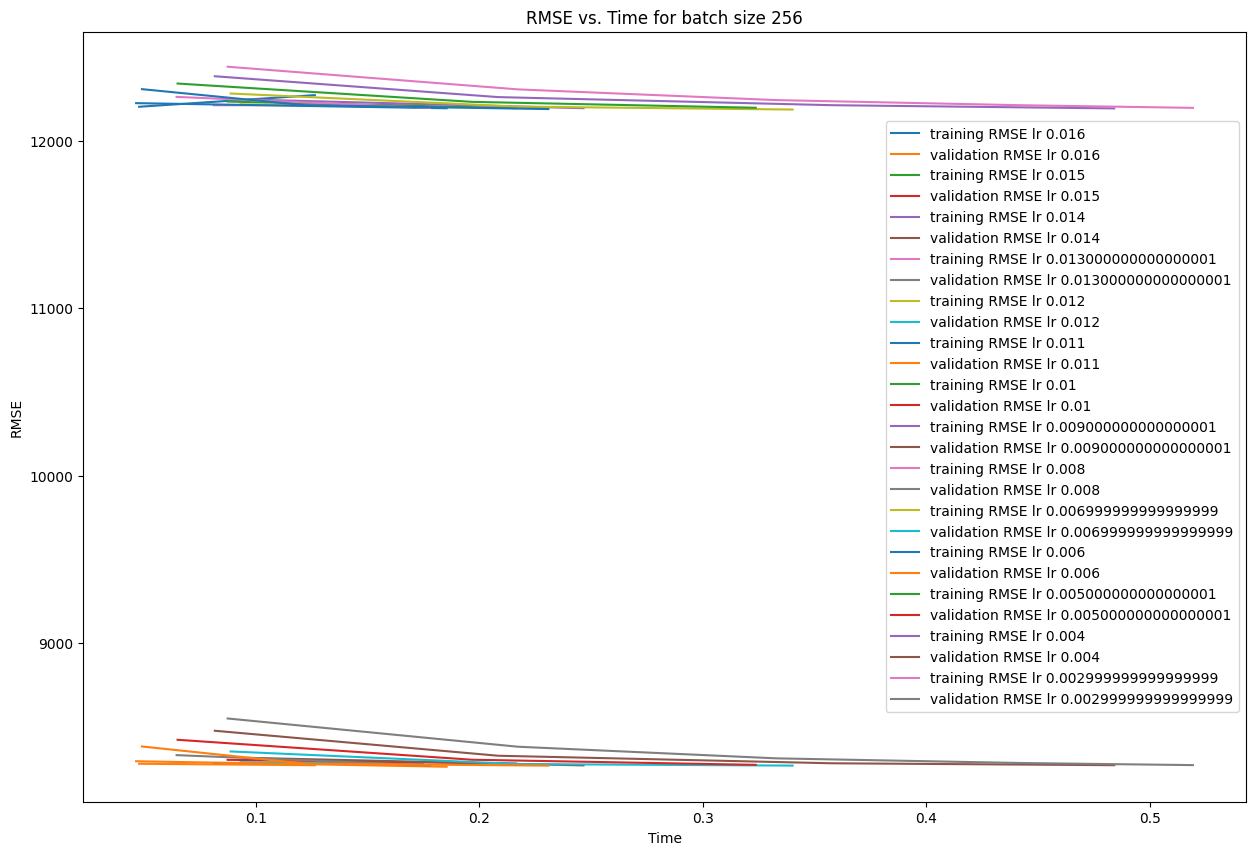

In [ ]:
Best_batch = 256
lr_original = 0.02
plt.figure(figsize=(15,10))
for m in range(4, 18):
  lr = lr_original - (m*0.001)
  final_w, rmse_train, rmse_val, elapsed_time, converge = MiniBatch_GradientDescent(X_train_standardized_1, X_val_standardized_1, y_train, y_val, Best_batch, lr, CT)
  plt.title('RMSE vs. Time for batch size 256')
  train_label = 'training RMSE lr '+ str(lr)
  plt.plot(elapsed_time, rmse_train, label = train_label)
  val_label = 'validation RMSE lr '+ str(lr)
  plt.plot(elapsed_time, rmse_val, label = val_label)
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend()